<a href="https://colab.research.google.com/github/naidu199/LLM-workshop/blob/main/MNIST_HandWritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch

In [ ]:
from torch.nn import functional as F
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


In [ ]:
# image input size 28*28
input_size=28*28
hidden_size=100 #liner layer invisible by increasing the number of hidden layers model can train good
num_classes=10 #numbers from 0 to 9
num_epochs=5 # training the  model number of times increasing number of epochs may increase the accuracy
batch_size=64 #number of images in each batch
learning_rate=0.001 #a little higher learning rate may increase the model move faster

In [ ]:
train_data=torchvision.datasets.MNIST(root="./data",train=True,transform=transforms.ToTensor(),download=True)
test_data=torchvision.datasets.MNIST(root="./data",train=False,transform=transforms.ToTensor(),download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 191962911.25it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 108739402.00it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 187498750.08it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14121963.50it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_loader=torch.utils.data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_data,batch_size=batch_size,shuffle=True)
print(len(train_loader),len(test_loader))

938 157


In [ ]:
import matplotlib.pyplot as plt
#loading the images
def imshow(img):
  npimg = img.numpy() #converting tensor image into numpy array for the matplotlib
  plt.imshow(np.transpose(npimg, (1, 2, 0))) #in tensor order is (channel,height,width) but matplotlib acceps (height,width,channel)
  plt.show()

def visualize(loader):
  dataiter = iter(loader) #iterating over the data loader
  images, labels = next(dataiter) #storing the next batch images and labes

  # show images
  imshow(torchvision.utils.make_grid(images))

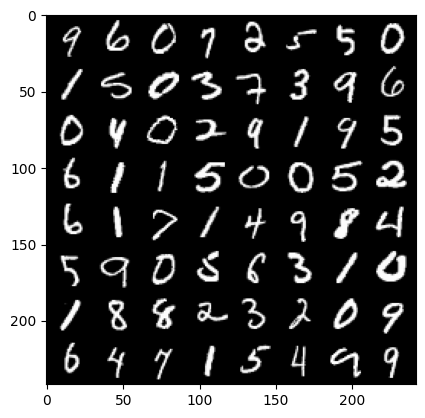

In [ ]:
visualize(train_loader)

In [ ]:
x, y = next(iter(train_loader))
print(x.shape, y.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size, bias=False),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, num_classes, bias=False)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=False)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=False)
)


In [ ]:
def count_parameters(model): #used for the counting of the parameters
  return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)

79400

In [ ]:
criterion = nn.CrossEntropyLoss() #for calculating the loss in the model classes
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #used to find the optimizing value for the class

In [ ]:
# training loop
from tqdm.notebook import tqdm # progress bar
for epoch in tqdm(range(num_epochs)): #epochs number of times we are training the data
  for i,(images, labels) in tqdm(enumerate(train_loader)):
    flattened_images = images.reshape(-1, 28*28) #reshaping the images into 2D(28,28) into 1D(28*28)
    optimizer.zero_grad() # to remove the previous iterate gradient valus
    outputs = model(flattened_images) #forward pass over the model
    loss = criterion(outputs, labels)
    loss.backward() #backward propagation
    optimizer.step()

    if((i+1)%100 == 0):
      print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}, Loss: {loss.item():.4f}]") #for every 100 batches it calculate the values



  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Epoch [1/5], Step [100/938, Loss: 2.2777]
Epoch [1/5], Step [200/938, Loss: 2.2606]
Epoch [1/5], Step [300/938, Loss: 2.2417]
Epoch [1/5], Step [400/938, Loss: 2.2050]
Epoch [1/5], Step [500/938, Loss: 2.2068]
Epoch [1/5], Step [600/938, Loss: 2.1862]
Epoch [1/5], Step [700/938, Loss: 2.1771]
Epoch [1/5], Step [800/938, Loss: 2.1378]
Epoch [1/5], Step [900/938, Loss: 2.1469]


0it [00:00, ?it/s]

Epoch [2/5], Step [100/938, Loss: 2.0427]
Epoch [2/5], Step [200/938, Loss: 2.0644]
Epoch [2/5], Step [300/938, Loss: 2.0129]
Epoch [2/5], Step [400/938, Loss: 2.0358]
Epoch [2/5], Step [500/938, Loss: 1.9865]
Epoch [2/5], Step [600/938, Loss: 1.9318]
Epoch [2/5], Step [700/938, Loss: 1.9406]
Epoch [2/5], Step [800/938, Loss: 1.8976]
Epoch [2/5], Step [900/938, Loss: 1.8705]


0it [00:00, ?it/s]

Epoch [3/5], Step [100/938, Loss: 1.8595]
Epoch [3/5], Step [200/938, Loss: 1.7745]
Epoch [3/5], Step [300/938, Loss: 1.7843]
Epoch [3/5], Step [400/938, Loss: 1.7347]
Epoch [3/5], Step [500/938, Loss: 1.7188]
Epoch [3/5], Step [600/938, Loss: 1.7056]
Epoch [3/5], Step [700/938, Loss: 1.5962]
Epoch [3/5], Step [800/938, Loss: 1.6177]
Epoch [3/5], Step [900/938, Loss: 1.6422]


0it [00:00, ?it/s]

Epoch [4/5], Step [100/938, Loss: 1.5943]
Epoch [4/5], Step [200/938, Loss: 1.4426]
Epoch [4/5], Step [300/938, Loss: 1.5528]
Epoch [4/5], Step [400/938, Loss: 1.4025]
Epoch [4/5], Step [500/938, Loss: 1.4033]
Epoch [4/5], Step [600/938, Loss: 1.4306]
Epoch [4/5], Step [700/938, Loss: 1.5114]
Epoch [4/5], Step [800/938, Loss: 1.4070]
Epoch [4/5], Step [900/938, Loss: 1.3289]


0it [00:00, ?it/s]

Epoch [5/5], Step [100/938, Loss: 1.2054]
Epoch [5/5], Step [200/938, Loss: 1.3248]
Epoch [5/5], Step [300/938, Loss: 1.2281]
Epoch [5/5], Step [400/938, Loss: 1.1621]
Epoch [5/5], Step [500/938, Loss: 1.1809]
Epoch [5/5], Step [600/938, Loss: 1.0500]
Epoch [5/5], Step [700/938, Loss: 1.2170]
Epoch [5/5], Step [800/938, Loss: 1.0673]
Epoch [5/5], Step [900/938, Loss: 1.1733]


In [ ]:
with torch.no_grad(): #turning off the gradient calculations
  correct = 0
  total = 0
  for images, labels in test_loader:
    flattened_images = images.reshape(-1, 28*28)
    outputs = model(flattened_images)
    #print(outputs.shape)
    _, predicted = torch.max(outputs.data, 1)
    #print(prob, predicted)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print(f"Accuracy: {100*correct/total:.3f}")

Accuracy: 81.060


Training with new parameter values

In [ ]:
!nvidia-smi

Fri Mar 22 08:13:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# image input size 28*28
input_size=28*28
hidden_size=200 #liner layer invisible by increasing the number of hidden layers model can train good
num_classes=10 #numbers from 0 to 9
num_epochs=10 # training the  model number of times increasing number of epochs may increase the accuracy
batch_size=64 #number of images in each batch
learning_rate=0.01 #a little higher learning rate may increase the model move faster

In [ ]:
model1 = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size, bias=False),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(hidden_size),
    torch.nn.Linear(hidden_size, num_classes, bias=False)
)

print(model1)

Sequential(
  (0): Linear(in_features=784, out_features=200, bias=False)
  (1): ReLU()
  (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=200, out_features=10, bias=False)
)


In [ ]:
criterion = nn.CrossEntropyLoss() #for calculating the loss in the model classes
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #used to find the optimizing value for the class
optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate) #for adaptive learning rates

In [ ]:
# training loop
from tqdm.notebook import tqdm # progress bar
for epoch in tqdm(range(num_epochs)): #epochs number of times we are training the data
  for i,(images, labels) in tqdm(enumerate(train_loader)):
    flattened_images = images.reshape(-1, 28*28) #reshaping the images into 2D(28,28) into 1D(28*28)
    optimizer.zero_grad() # to remove the previous iterate gradient valus
    outputs = model1(flattened_images) #forward pass over the model
    loss = criterion(outputs, labels)
    loss.backward() #backward propagation
    optimizer.step()

    if((i+1)%100 == 0):
      print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}, Loss: {loss.item():.4f}]") #for every 100 batches it calculate the values



  0%|          | 0/10 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Epoch [1/10], Step [100/938, Loss: 0.3719]
Epoch [1/10], Step [200/938, Loss: 0.2750]
Epoch [1/10], Step [300/938, Loss: 0.1145]
Epoch [1/10], Step [400/938, Loss: 0.0847]
Epoch [1/10], Step [500/938, Loss: 0.0780]
Epoch [1/10], Step [600/938, Loss: 0.1670]
Epoch [1/10], Step [700/938, Loss: 0.1871]
Epoch [1/10], Step [800/938, Loss: 0.2527]
Epoch [1/10], Step [900/938, Loss: 0.0763]


0it [00:00, ?it/s]

Epoch [2/10], Step [100/938, Loss: 0.0737]
Epoch [2/10], Step [200/938, Loss: 0.2004]
Epoch [2/10], Step [300/938, Loss: 0.0443]
Epoch [2/10], Step [400/938, Loss: 0.0698]
Epoch [2/10], Step [500/938, Loss: 0.1999]
Epoch [2/10], Step [600/938, Loss: 0.0936]
Epoch [2/10], Step [700/938, Loss: 0.2004]
Epoch [2/10], Step [800/938, Loss: 0.1521]
Epoch [2/10], Step [900/938, Loss: 0.2699]


0it [00:00, ?it/s]

Epoch [3/10], Step [100/938, Loss: 0.0787]
Epoch [3/10], Step [200/938, Loss: 0.0985]
Epoch [3/10], Step [300/938, Loss: 0.0831]
Epoch [3/10], Step [400/938, Loss: 0.0529]
Epoch [3/10], Step [500/938, Loss: 0.0662]
Epoch [3/10], Step [600/938, Loss: 0.2503]
Epoch [3/10], Step [700/938, Loss: 0.0158]
Epoch [3/10], Step [800/938, Loss: 0.0201]
Epoch [3/10], Step [900/938, Loss: 0.0755]


0it [00:00, ?it/s]

Epoch [4/10], Step [100/938, Loss: 0.0449]
Epoch [4/10], Step [200/938, Loss: 0.0728]
Epoch [4/10], Step [300/938, Loss: 0.0444]
Epoch [4/10], Step [400/938, Loss: 0.0077]
Epoch [4/10], Step [500/938, Loss: 0.0771]
Epoch [4/10], Step [600/938, Loss: 0.0373]
Epoch [4/10], Step [700/938, Loss: 0.1214]
Epoch [4/10], Step [800/938, Loss: 0.1091]
Epoch [4/10], Step [900/938, Loss: 0.0948]


0it [00:00, ?it/s]

Epoch [5/10], Step [100/938, Loss: 0.0197]
Epoch [5/10], Step [200/938, Loss: 0.0405]
Epoch [5/10], Step [300/938, Loss: 0.0356]
Epoch [5/10], Step [400/938, Loss: 0.0149]
Epoch [5/10], Step [500/938, Loss: 0.0155]
Epoch [5/10], Step [600/938, Loss: 0.3080]
Epoch [5/10], Step [700/938, Loss: 0.0831]
Epoch [5/10], Step [800/938, Loss: 0.0391]
Epoch [5/10], Step [900/938, Loss: 0.2033]


0it [00:00, ?it/s]

Epoch [6/10], Step [100/938, Loss: 0.0080]
Epoch [6/10], Step [200/938, Loss: 0.0744]
Epoch [6/10], Step [300/938, Loss: 0.0065]
Epoch [6/10], Step [400/938, Loss: 0.0094]
Epoch [6/10], Step [500/938, Loss: 0.0659]
Epoch [6/10], Step [600/938, Loss: 0.1021]
Epoch [6/10], Step [700/938, Loss: 0.1387]
Epoch [6/10], Step [800/938, Loss: 0.0834]
Epoch [6/10], Step [900/938, Loss: 0.0699]


0it [00:00, ?it/s]

Epoch [7/10], Step [100/938, Loss: 0.0488]
Epoch [7/10], Step [200/938, Loss: 0.1437]
Epoch [7/10], Step [300/938, Loss: 0.0148]
Epoch [7/10], Step [400/938, Loss: 0.0357]
Epoch [7/10], Step [500/938, Loss: 0.0701]
Epoch [7/10], Step [600/938, Loss: 0.0590]
Epoch [7/10], Step [700/938, Loss: 0.0120]
Epoch [7/10], Step [800/938, Loss: 0.0780]
Epoch [7/10], Step [900/938, Loss: 0.0494]


0it [00:00, ?it/s]

Epoch [8/10], Step [100/938, Loss: 0.0989]
Epoch [8/10], Step [200/938, Loss: 0.0294]
Epoch [8/10], Step [300/938, Loss: 0.0322]
Epoch [8/10], Step [400/938, Loss: 0.0238]
Epoch [8/10], Step [500/938, Loss: 0.0854]
Epoch [8/10], Step [600/938, Loss: 0.0515]
Epoch [8/10], Step [700/938, Loss: 0.0060]
Epoch [8/10], Step [800/938, Loss: 0.0868]
Epoch [8/10], Step [900/938, Loss: 0.0329]


0it [00:00, ?it/s]

Epoch [9/10], Step [100/938, Loss: 0.0571]
Epoch [9/10], Step [200/938, Loss: 0.0041]
Epoch [9/10], Step [300/938, Loss: 0.0063]
Epoch [9/10], Step [400/938, Loss: 0.0667]
Epoch [9/10], Step [500/938, Loss: 0.0339]
Epoch [9/10], Step [600/938, Loss: 0.0050]
Epoch [9/10], Step [700/938, Loss: 0.0345]
Epoch [9/10], Step [800/938, Loss: 0.0058]
Epoch [9/10], Step [900/938, Loss: 0.1126]


0it [00:00, ?it/s]

Epoch [10/10], Step [100/938, Loss: 0.0010]
Epoch [10/10], Step [200/938, Loss: 0.0529]
Epoch [10/10], Step [300/938, Loss: 0.1337]
Epoch [10/10], Step [400/938, Loss: 0.0050]
Epoch [10/10], Step [500/938, Loss: 0.0115]
Epoch [10/10], Step [600/938, Loss: 0.0584]
Epoch [10/10], Step [700/938, Loss: 0.0344]
Epoch [10/10], Step [800/938, Loss: 0.0401]
Epoch [10/10], Step [900/938, Loss: 0.1339]


In [ ]:
with torch.no_grad(): #turning off the gradient calculations
  correct = 0
  total = 0
  for images, labels in test_loader:
    flattened_images = images.reshape(-1, 28*28)
    outputs = model1(flattened_images)
    #print(outputs.shape)
    _, predicted = torch.max(outputs.data, 1)
    #print(prob, predicted)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print(f"Accuracy: {100*correct/total:.3f}")

Accuracy: 97.430


creating our own model

In [ ]:
# image input size 28*28
input_size=28*28
hidden_size=100 #liner layer invisible by increasing the number of hidden layers model can train good
num_classes=10 #numbers from 0 to 9
num_epochs=5 # training the  model number of times increasing number of epochs may increase the accuracy
batch_size=64 #number of images in each batch
learning_rate=0.01 #a little higher learning rate may increase the model move faster

In [ ]:
class MnistModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
        super(MnistModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out


model2 = MnistModel(input_size, hidden_size, num_classes)
print(model2)

MnistModel(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (relu): ReLU()
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
device="cuda " if torch.cuda.is_available() else "cpu"
print(device)

cuda 


In [ ]:
criterion = nn.CrossEntropyLoss() #for calculating the loss in the model classes
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate) #for adaptive learning rates

In [ ]:
# training loop
from tqdm.notebook import tqdm # progress bar
for epoch in tqdm(range(num_epochs)): #epochs number of times we are training the data
  for i,(images, labels) in tqdm(enumerate(train_loader)):
    flattened_images = images.reshape(-1, 28*28) #reshaping the images into 2D(28,28) into 1D(28*28)
    optimizer.zero_grad() # to remove the previous iterate gradient valus
    outputs = model2(flattened_images) #forward pass over the model
    loss = criterion(outputs, labels)
    loss.backward() #backward propagation
    optimizer.step()

    if((i+1)%100 == 0):
      print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}, Loss: {loss.item():.4f}]") #for every 100 batches it calculate the values



  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Epoch [1/5], Step [100/938, Loss: 0.2884]
Epoch [1/5], Step [200/938, Loss: 0.5531]
Epoch [1/5], Step [300/938, Loss: 0.1962]
Epoch [1/5], Step [400/938, Loss: 0.4323]
Epoch [1/5], Step [500/938, Loss: 0.4002]
Epoch [1/5], Step [600/938, Loss: 0.2620]
Epoch [1/5], Step [700/938, Loss: 0.2592]
Epoch [1/5], Step [800/938, Loss: 0.1102]
Epoch [1/5], Step [900/938, Loss: 0.1344]


0it [00:00, ?it/s]

Epoch [2/5], Step [100/938, Loss: 0.0762]
Epoch [2/5], Step [200/938, Loss: 0.2906]
Epoch [2/5], Step [300/938, Loss: 0.1447]
Epoch [2/5], Step [400/938, Loss: 0.0784]
Epoch [2/5], Step [500/938, Loss: 0.0854]
Epoch [2/5], Step [600/938, Loss: 0.1322]
Epoch [2/5], Step [700/938, Loss: 0.0849]
Epoch [2/5], Step [800/938, Loss: 0.1767]
Epoch [2/5], Step [900/938, Loss: 0.0934]


0it [00:00, ?it/s]

Epoch [3/5], Step [100/938, Loss: 0.3459]
Epoch [3/5], Step [200/938, Loss: 0.0660]
Epoch [3/5], Step [300/938, Loss: 0.0898]
Epoch [3/5], Step [400/938, Loss: 0.0753]
Epoch [3/5], Step [500/938, Loss: 0.1397]
Epoch [3/5], Step [600/938, Loss: 0.1428]
Epoch [3/5], Step [700/938, Loss: 0.1952]
Epoch [3/5], Step [800/938, Loss: 0.1485]
Epoch [3/5], Step [900/938, Loss: 0.2899]


0it [00:00, ?it/s]

Epoch [4/5], Step [100/938, Loss: 0.2693]
Epoch [4/5], Step [200/938, Loss: 0.0514]
Epoch [4/5], Step [300/938, Loss: 0.0424]
Epoch [4/5], Step [400/938, Loss: 0.2737]
Epoch [4/5], Step [500/938, Loss: 0.0377]
Epoch [4/5], Step [600/938, Loss: 0.2066]
Epoch [4/5], Step [700/938, Loss: 0.2137]
Epoch [4/5], Step [800/938, Loss: 0.0973]
Epoch [4/5], Step [900/938, Loss: 0.0850]


0it [00:00, ?it/s]

Epoch [5/5], Step [100/938, Loss: 0.1713]
Epoch [5/5], Step [200/938, Loss: 0.1569]
Epoch [5/5], Step [300/938, Loss: 0.0095]
Epoch [5/5], Step [400/938, Loss: 0.1207]
Epoch [5/5], Step [500/938, Loss: 0.0484]
Epoch [5/5], Step [600/938, Loss: 0.0659]
Epoch [5/5], Step [700/938, Loss: 0.0885]
Epoch [5/5], Step [800/938, Loss: 0.0386]
Epoch [5/5], Step [900/938, Loss: 0.0082]


In [ ]:
with torch.no_grad(): #turning off the gradient calculations
  correct = 0
  total = 0
  for images, labels in test_loader:
    flattened_images = images.reshape(-1, 28*28)
    outputs = model2(flattened_images)
    #print(outputs.shape)
    _, predicted = torch.max(outputs.data, 1)
    #print(prob, predicted)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print(f"Accuracy: {100*correct/total:.3f}")

Accuracy: 96.460


model 3

In [ ]:
class MnistModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
        super(MnistModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(2*hidden_size, num_classes)

  def forward(self, x):
        out = self.fc1(x) # output 64x100
        out = self.relu(out)
        out = self.fc2(out) # 64x100
        out1 = self.relu(out)
        out = self.fc3(out1) # 64x100
        out2 = self.relu(out)
        merged = torch.cat((out1, out2), dim = 1) # 64x200
        out = self.fc4(merged) # 64x10
        return out


model3 = MnistModel(input_size, hidden_size, num_classes)
print(model3)

MnistModel(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (relu): ReLU()
  (fc4): Linear(in_features=200, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss() #for calculating the loss in the model classes
optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate) #for adaptive learning rates

In [ ]:
# training loop
from tqdm.notebook import tqdm # progress bar
for epoch in tqdm(range(num_epochs)): #epochs number of times we are training the data
  for i,(images, labels) in tqdm(enumerate(train_loader)):
    flattened_images = images.reshape(-1, 28*28) #reshaping the images into 2D(28,28) into 1D(28*28)
    optimizer.zero_grad() # to remove the previous iterate gradient valus
    outputs = model3(flattened_images) #forward pass over the model
    loss = criterion(outputs, labels)
    loss.backward() #backward propagation
    optimizer.step()

    if((i+1)%100 == 0):
      print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}, Loss: {loss.item():.4f}]") #for every 100 batches it calculate the values



  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Epoch [1/5], Step [100/938, Loss: 0.1712]
Epoch [1/5], Step [200/938, Loss: 0.4272]
Epoch [1/5], Step [300/938, Loss: 0.2372]
Epoch [1/5], Step [400/938, Loss: 0.3271]
Epoch [1/5], Step [500/938, Loss: 0.1973]
Epoch [1/5], Step [600/938, Loss: 0.4912]
Epoch [1/5], Step [700/938, Loss: 0.1524]
Epoch [1/5], Step [800/938, Loss: 0.1717]
Epoch [1/5], Step [900/938, Loss: 0.1736]


0it [00:00, ?it/s]

Epoch [2/5], Step [100/938, Loss: 0.1673]
Epoch [2/5], Step [200/938, Loss: 0.1771]
Epoch [2/5], Step [300/938, Loss: 0.1561]
Epoch [2/5], Step [400/938, Loss: 0.2310]
Epoch [2/5], Step [500/938, Loss: 0.2885]
Epoch [2/5], Step [600/938, Loss: 0.1060]
Epoch [2/5], Step [700/938, Loss: 0.0759]
Epoch [2/5], Step [800/938, Loss: 0.2494]
Epoch [2/5], Step [900/938, Loss: 0.1369]


0it [00:00, ?it/s]

Epoch [3/5], Step [100/938, Loss: 0.5279]
Epoch [3/5], Step [200/938, Loss: 0.0285]
Epoch [3/5], Step [300/938, Loss: 0.3212]
Epoch [3/5], Step [400/938, Loss: 0.2244]
Epoch [3/5], Step [500/938, Loss: 0.1648]
Epoch [3/5], Step [600/938, Loss: 0.1353]
Epoch [3/5], Step [700/938, Loss: 0.2491]
Epoch [3/5], Step [800/938, Loss: 0.2534]
Epoch [3/5], Step [900/938, Loss: 0.0711]


0it [00:00, ?it/s]

Epoch [4/5], Step [100/938, Loss: 0.0171]
Epoch [4/5], Step [200/938, Loss: 0.1493]
Epoch [4/5], Step [300/938, Loss: 0.0654]
Epoch [4/5], Step [400/938, Loss: 0.1713]
Epoch [4/5], Step [500/938, Loss: 0.1315]
Epoch [4/5], Step [600/938, Loss: 0.1143]
Epoch [4/5], Step [700/938, Loss: 0.1346]
Epoch [4/5], Step [800/938, Loss: 0.1026]
Epoch [4/5], Step [900/938, Loss: 0.1070]


0it [00:00, ?it/s]

Epoch [5/5], Step [100/938, Loss: 0.1525]
Epoch [5/5], Step [200/938, Loss: 0.0408]
Epoch [5/5], Step [300/938, Loss: 0.0430]
Epoch [5/5], Step [400/938, Loss: 0.0644]
Epoch [5/5], Step [500/938, Loss: 0.1900]
Epoch [5/5], Step [600/938, Loss: 0.2468]
Epoch [5/5], Step [700/938, Loss: 0.0325]
Epoch [5/5], Step [800/938, Loss: 0.0751]
Epoch [5/5], Step [900/938, Loss: 0.2076]


In [ ]:
with torch.no_grad(): #turning off the gradient calculations
  correct = 0
  total = 0
  for images, labels in test_loader:
    flattened_images = images.reshape(-1, 28*28)
    outputs = model3(flattened_images)
    #print(outputs.shape)
    _, predicted = torch.max(outputs.data, 1)
    #print(prob, predicted)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print(f"Accuracy: {100*correct/total:.3f}")

Accuracy: 96.540
